In [91]:
import bayesian_quadrature
import numpy as np
from gp import GaussianKernel
from bayesian_quadrature import BQ

options = {
    'n_candidate': 10,
    'x_mean': 0.0,
    'x_var': 1.0,
    'candidate_thresh': 0.01,
    'kernel': GaussianKernel,
    'optim_method': 'Powell'
}
import scipy.stats
import numpy as np
def f_temp(x):
    return [scipy.stats.norm(3, 1).pdf(x[0])]
def f(x):
    return [scipy.stats.norm(3, 1).pdf(x[0]),scipy.stats.norm(0, 1).pdf(x[1])]
def flambda(a):
    modifier = 100*scipy.stats.norm(2,1).pdf(a)
    return lambda x: scipy.stats.norm(0, 1).pdf(x) * modifier


In [97]:
A = {}
actions = np.linspace(-10,10,10)
Xs = {}
Ys = {}
gps = {}
for i,a in enumerate(actions):
    print i
    X = np.random.uniform(-10,10,size=(5,))
    Y = X.copy()
    Y = flambda(a)(Y)
    Xs[a] = X
    Ys[a] = Y
    print X,Y
    gps[a] = BQ(X, Y, **options)
    gps[a].init(params_tl=(2, 2, 0), params_l=(0.2, 1.3, 0))
    A[a] = (gps[a].Z_mean(),gps[a].Z_var())

0
[ 0.41045849  9.99167894 -9.10496202  5.33624463 -4.61256113] [7.87106139e-31 1.79480061e-52 8.53176244e-49 5.61357728e-37
 2.05425099e-35]
1
[-6.79112376  3.13265021 -1.83758174  6.98367545  3.86287784] [2.67164889e-30 2.04407907e-22 5.10774296e-21 7.09294413e-31
 1.58941899e-23]
2
[-8.53085181 -7.00305564  2.32149411 -3.73577229 -3.85915954] [1.00618347e-27 1.43270057e-22 4.31899178e-13 5.95875954e-15
 3.72960918e-15]
3
[-0.03637684  0.79504515 -8.3464187  -3.59210328  2.62507618] [1.05901023e-05 7.72555033e-06 7.90903116e-21 1.67221426e-08
 3.37925098e-07]
4
[ 4.92796469  3.61710169  4.56316944  6.35353969 -4.48591736] [6.70909847e-07 1.81559820e-04 3.78876403e-06 2.15956024e-10
 5.37398780e-06]
5
[-3.45768908  0.56524589  2.5307757   0.83271032 -6.186148  ] [2.71718032e-02 9.13835079e+00 4.35970177e-01 7.58011334e+00
 5.25247091e-08]
6
[ 2.20124892  1.01848345 -5.35063685 -5.89299367 -0.34862716] [5.80222185e-01 3.89521923e+00 3.97195119e-06 1.88289914e-07
 6.15727175e+00]
7
[ 5.

In [98]:
def extend(rand=False):
    maxa = max(A, key=lambda a:A[a][0]+A[a][1])
    if rand:
        maxa = np.random.choice(A.keys())
    print maxa
    
    params = ['h', 'w']
    x_a = np.sort(np.random.uniform(-10, 10, 5))
    x = gps[maxa].choose_next(x_a, n=100, params=params)
    
#     Xs[maxa] = np.append(Xs[maxa],np.array([x]))
#     Ys[maxa] = np.append(Ys[maxa],np.array([flambda(maxa)(x)]))
#     print Xs[maxa].shape, Ys[maxa].shape
    gps[maxa].add_observation(x, flambda(maxa)(x))
    gps[maxa].fit_hypers(params)
    A[maxa] = (gps[a].Z_mean(),gps[a].Z_var())
    print A[maxa]

In [99]:
for i in range(20):
    extend(i%5==0)

-1.1111111111111107
(1.7974766243231687e-08, 9.160514817589776e-17)
1.1111111111111107


/Users/ngothosk/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


(1.7974766243231687e-08, 9.160514817589776e-17)
3.333333333333334
(1.7974766243231687e-08, 9.160514817589776e-17)
5.555555555555557
(1.7974766243231687e-08, 9.160514817589776e-17)
-3.333333333333333


WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-2.56304628] is infinity!


(1.7974766243231687e-08, 9.160514817589776e-17)
5.555555555555557


WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.43857472] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.43857472] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.43857472] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.43857472] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[0.33235782] is 

WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-9.72312057] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-9.72312057] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[0.33235782] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-9.72312057] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-9.72312057]

WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.43857472] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-9.72312057] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-9.72312057] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.15699907] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-2.56304628] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[0.33235782]

(1.7974766243231687e-08, 9.160514817589776e-17)
7.777777777777779
(1.7974766243231687e-08, 9.160514817589776e-17)
1.1111111111111107


WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-9.30734036] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-9.30734036] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-7.87399153] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-7.87399153] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[3.35435749] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[3.35435749] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[-9.30734036] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[-9.30734036] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.53052074] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.53052074] is infinity!
WARNING -- MainProcess/bq.py -- expected squared mean for x_a=[5.53052074] is infinity!
WARNING -- MainProcess/bq.py -- expected mean for x_a=[5.53052074]

LinAlgError: 7-th leading minor of the array is not positive definite

(<matplotlib.figure.Figure at 0x111ca5810>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x111d31ed0>,
       dtype=object))

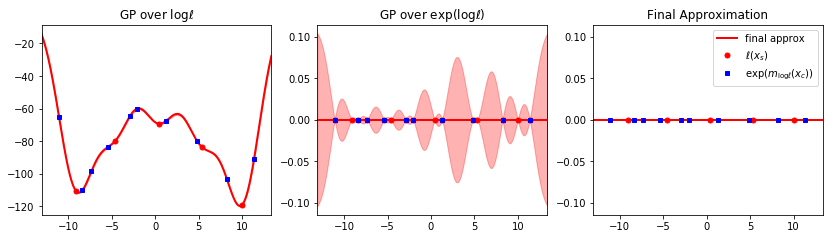

In [106]:
gps[-10.0].plot()